In [1]:
import tensorflow as tf

from data_loader.ISPRS_data_loader import ISPRSLoader
from models.fcn_base_model import FcnBaseModel
from trainers.aerial_image_trainer import AerialImageTrainer
# from models.unet_model import UNetModel
# from trainers.road_trainer import RoadTrainer

from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
from utils.visualize import *
import scipy.misc



json_file = "configs/fcn_ISPRS_Vaihingen_config.json"
json_file

config = process_config(json_file)

# config.num_epochs = 1
# config.num_iter_per_epoch = 100

print(config)


colordict = {0:[255,0,0],
             1:[255,255,255],
             2:[0,0,255],
             3:[0,255,255],
             4:[0,255,0],
             5:[255,255,0]}

accuracy: sparse_categorical_crossentropy
batch_size: 5
checkpoint_dir: ./experiments\fcn_Vaihingen\checkpoint/
data_path: C:\Users\TT260256\My Project\NNs\ISPRS_benchmarks_datasets\Vaihingen\
exp_name: fcn_Vaihingen
final_model_dir: ./experiments\fcn_Vaihingen\saved_model/
image_size:
- 256
- 256
- 3
images_dir: ./experiments\fcn_Vaihingen\images/
learning_rate: 0.00023949513325777832
loss: scce
max_to_keep: 5
n_classes: 3
num_epochs: 45
num_iter_per_epoch: 1000
summary_dir: ./experiments\fcn_Vaihingen\summary/



In [2]:
data = ISPRSLoader(config)

Yeah this is the path to dataset : C:\Users\TT260256\My Project\NNs\ISPRS_benchmarks_datasets\Vaihingen\
Training set : 11 images, Validation set : 5 images
Size of normalized training images :  (5768, 256, 256, 3)
Size of normalized validation images :  (325, 256, 256, 3)
Size of normalized training masks :  (5768, 256, 256)
Size of normalized validation masks :  (325, 256, 256)


(256, 256, 3)
(256, 256)


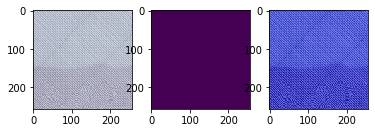

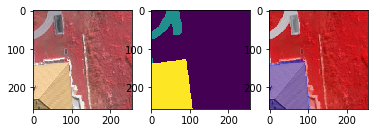

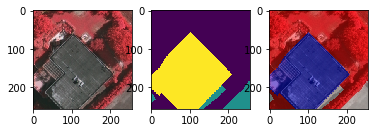

In [3]:
print(data.train_norm_image[0].shape)
print(data.train_norm_mask[0].shape)
for i in range(3):
    image = data.train_norm_image[i]
    mask = data.train_norm_mask[i]
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(mask)
    plt.subplot(133)
    visualize_output(image,mask,colordict)

In [4]:
tf.reset_default_graph()
model = FcnBaseModel(config)
model.build()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Model built successfully.


In [5]:
# create a builder for saving the model 
builder = tf.saved_model.builder.SavedModelBuilder(config.final_model_dir)

In [6]:
sess = tf.Session()
logger = Logger(sess,config)
trainer = AerialImageTrainer(sess,model,data,config,logger)
trainer.train()
model.load(sess)
print("Saving the final model..")
builder.add_meta_graph_and_variables(sess,
                                   [tf.saved_model.tag_constants.TRAINING],
                                   signature_def_map=None,
                                   assets_collection=None)
builder.save()
print("Final model saved")

Variables initialized
Epoch  0  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:14<00:00,  1.81it/s]


-->Last epoch loss     :  0.606292
-->Last epoch accuracy :  0.727986
-->Last test loss      :  0.45676
-->Last test accuracy  :  0.818127
-->Last test mean iou  :  0.6593
[BEST LOST : 0.45676010847091675]
Saving model...
Model saved
Epoch  1  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:33<00:00,  1.74it/s]


-->Last epoch loss     :  0.44839
-->Last epoch accuracy :  0.821763
-->Last test loss      :  0.417696
-->Last test accuracy  :  0.834794
-->Last test mean iou  :  0.674585
[BEST LOST : 0.4176955819129944]
Saving model...
Model saved
Epoch  2  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:12<00:00,  1.82it/s]


-->Last epoch loss     :  0.398173
-->Last epoch accuracy :  0.841864
-->Last test loss      :  0.406746
-->Last test accuracy  :  0.841458
-->Last test mean iou  :  0.683009
[BEST LOST : 0.40674638748168945]
Saving model...
Model saved
Epoch  3  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:10<00:00,  1.83it/s]


-->Last epoch loss     :  0.368114
-->Last epoch accuracy :  0.854423
-->Last test loss      :  0.354134
-->Last test accuracy  :  0.858686
-->Last test mean iou  :  0.693955
[BEST LOST : 0.3541337847709656]
Saving model...
Model saved
Epoch  4  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:05<00:00,  1.85it/s]


-->Last epoch loss     :  0.350891
-->Last epoch accuracy :  0.860148
-->Last test loss      :  0.351623
-->Last test accuracy  :  0.861938
-->Last test mean iou  :  0.701524
[BEST LOST : 0.351622611284256]
Saving model...
Model saved
Epoch  5  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:06<00:00,  1.88it/s]


-->Last epoch loss     :  0.331692
-->Last epoch accuracy :  0.867585
-->Last test loss      :  0.351613
-->Last test accuracy  :  0.859318
-->Last test mean iou  :  0.706139
[BEST LOST : 0.3516126275062561]
Saving model...
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Model saved
Epoch  6  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:03<00:00,  1.85it/s]


-->Last epoch loss     :  0.320384
-->Last epoch accuracy :  0.872411
-->Last test loss      :  0.406873
-->Last test accuracy  :  0.83206
-->Last test mean iou  :  0.702038
Epoch  7  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:02<00:00,  1.83it/s]


-->Last epoch loss     :  0.308656
-->Last epoch accuracy :  0.87653
-->Last test loss      :  0.329522
-->Last test accuracy  :  0.868468
-->Last test mean iou  :  0.70722
[BEST LOST : 0.3295220136642456]
Saving model...
Model saved
Epoch  8  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:16<00:00,  1.80it/s]


-->Last epoch loss     :  0.303105
-->Last epoch accuracy :  0.879241
-->Last test loss      :  0.361803
-->Last test accuracy  :  0.856232
-->Last test mean iou  :  0.70935
Epoch  9  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:08<00:00,  1.85it/s]


-->Last epoch loss     :  0.291282
-->Last epoch accuracy :  0.883845
-->Last test loss      :  0.312366
-->Last test accuracy  :  0.876378
-->Last test mean iou  :  0.714344
[BEST LOST : 0.31236574053764343]
Saving model...
Model saved
Epoch  10  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:13<00:00,  1.78it/s]


-->Last epoch loss     :  0.279994
-->Last epoch accuracy :  0.888378
-->Last test loss      :  0.336533
-->Last test accuracy  :  0.872894
-->Last test mean iou  :  0.717682
Epoch  11  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:13<00:00,  1.85it/s]


-->Last epoch loss     :  0.273923
-->Last epoch accuracy :  0.891106
-->Last test loss      :  0.311662
-->Last test accuracy  :  0.876383
-->Last test mean iou  :  0.720933
[BEST LOST : 0.31166160106658936]
Saving model...
Model saved
Epoch  12  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:07<00:00,  1.85it/s]


-->Last epoch loss     :  0.257564
-->Last epoch accuracy :  0.897402
-->Last test loss      :  0.304284
-->Last test accuracy  :  0.880498
-->Last test mean iou  :  0.724483
[BEST LOST : 0.30428406596183777]
Saving model...
Model saved
Epoch  13  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:04<00:00,  1.84it/s]


-->Last epoch loss     :  0.254954
-->Last epoch accuracy :  0.898318
-->Last test loss      :  0.372294
-->Last test accuracy  :  0.850792
-->Last test mean iou  :  0.723854
Epoch  14  : learning_rate =  0.000239495


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:06<00:00,  1.85it/s]


-->Last epoch loss     :  0.257991
-->Last epoch accuracy :  0.897398
-->Last test loss      :  0.308611
-->Last test accuracy  :  0.881063
-->Last test mean iou  :  0.726323
Epoch  15  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:09<00:00,  1.81it/s]


-->Last epoch loss     :  0.219283
-->Last epoch accuracy :  0.912164
-->Last test loss      :  0.297569
-->Last test accuracy  :  0.885834
-->Last test mean iou  :  0.729324
[BEST LOST : 0.2975686192512512]
Saving model...
Model saved
Epoch  16  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:14<00:00,  1.78it/s]


-->Last epoch loss     :  0.216501
-->Last epoch accuracy :  0.913035
-->Last test loss      :  0.300029
-->Last test accuracy  :  0.88542
-->Last test mean iou  :  0.731967
Epoch  17  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:13<00:00,  1.84it/s]


-->Last epoch loss     :  0.216328
-->Last epoch accuracy :  0.91324
-->Last test loss      :  0.301775
-->Last test accuracy  :  0.884704
-->Last test mean iou  :  0.734301
Epoch  18  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:14<00:00,  1.85it/s]


-->Last epoch loss     :  0.211725
-->Last epoch accuracy :  0.914712
-->Last test loss      :  0.294601
-->Last test accuracy  :  0.888357
-->Last test mean iou  :  0.736721
[BEST LOST : 0.29460129141807556]
Saving model...
Model saved
Epoch  19  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:16<00:00,  1.84it/s]


-->Last epoch loss     :  0.207008
-->Last epoch accuracy :  0.916807
-->Last test loss      :  0.300927
-->Last test accuracy  :  0.886023
-->Last test mean iou  :  0.738656
Epoch  20  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:06<00:00,  1.85it/s]


-->Last epoch loss     :  0.210628
-->Last epoch accuracy :  0.915193
-->Last test loss      :  0.309207
-->Last test accuracy  :  0.884351
-->Last test mean iou  :  0.740298
Epoch  21  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:11<00:00,  1.83it/s]


-->Last epoch loss     :  0.206778
-->Last epoch accuracy :  0.916826
-->Last test loss      :  0.304164
-->Last test accuracy  :  0.886924
-->Last test mean iou  :  0.741984
Epoch  22  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:14<00:00,  1.80it/s]


-->Last epoch loss     :  0.205945
-->Last epoch accuracy :  0.916765
-->Last test loss      :  0.303701
-->Last test accuracy  :  0.886621
-->Last test mean iou  :  0.743563
Epoch  23  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:14<00:00,  1.84it/s]


-->Last epoch loss     :  0.205068
-->Last epoch accuracy :  0.917291
-->Last test loss      :  0.305343
-->Last test accuracy  :  0.885867
-->Last test mean iou  :  0.744882
Epoch  24  : learning_rate =  2.39495e-05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:18<00:00,  1.85it/s]


-->Last epoch loss     :  0.203958
-->Last epoch accuracy :  0.917495
-->Last test loss      :  0.310969
-->Last test accuracy  :  0.885857
-->Last test mean iou  :  0.746216
Early Stopping !
Loading model checkpoint ./experiments\fcn_Vaihingen\checkpoint/-19000 ...
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./experiments\fcn_Vaihingen\checkpoint/-19000
Model loaded
Saving the final model..
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./experiments\fcn_Vaihingen\saved_model/saved_model.pb
Final model saved


Loading model checkpoint ./experiments\fcn_Vaihingen\checkpoint/-19000 ...
INFO:tensorflow:Restoring parameters from ./experiments\fcn_Vaihingen\checkpoint/-19000
Model loaded
0.294601
Accuracy :  0.988327


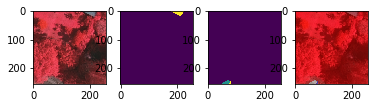

Accuracy :  0.931747


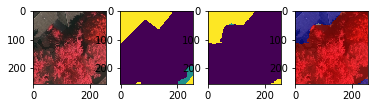

Accuracy :  0.882751


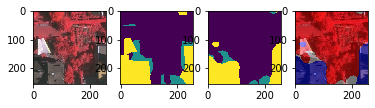

Accuracy :  0.963028


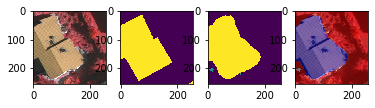

Accuracy :  0.871735


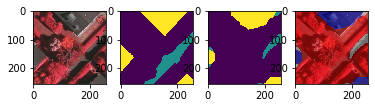

Accuracy :  0.954681


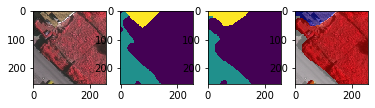

Accuracy :  0.868362


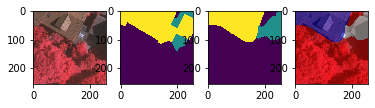

Accuracy :  0.909622


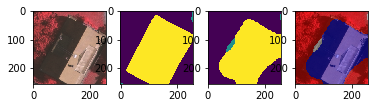

Accuracy :  0.75473


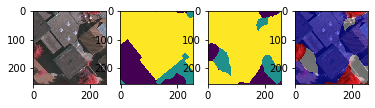

Accuracy :  0.817261


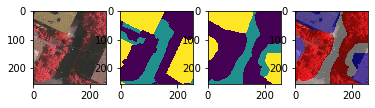

Accuracy :  0.942245


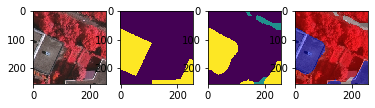

Accuracy :  0.929489


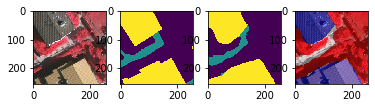

Accuracy :  0.933426


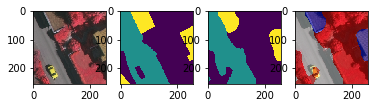

Accuracy :  0.953751


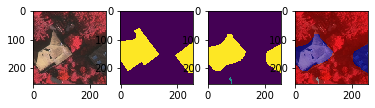

Accuracy :  0.888962


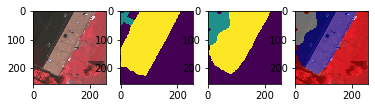

Accuracy :  0.861145


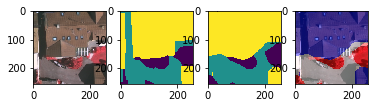

Accuracy :  0.795486


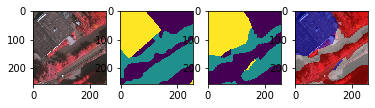

Accuracy :  0.868896


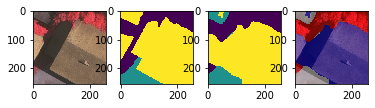

Accuracy :  0.976547


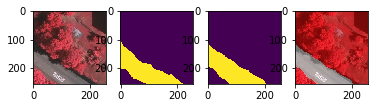

Accuracy :  0.90657


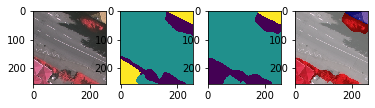

In [10]:
model.load(sess)
print(model.best_loss.eval(sess))
test = [data.get_data_element("valid_data",i) for i in range(20)]
for idx,item in enumerate(test) :
    img = item[0]#.reshape(config.image_size[0],config.image_size[1])
    mask = item[1]
    out_pred,acc = model.predict(sess,img,mask)
    plt.subplot(141)
    plt.imshow(img)
    plt.subplot(142)
    plt.imshow(mask)
    plt.subplot(143)
    plt.imshow(out_pred)
    plt.subplot(144)
    out = visualize_output(img,out_pred,colordict)
    save_output(out, config.images_dir + "out{}.tif".format(idx))

In [8]:
# sess.close()

In [9]:
# sess =  tf.Session()
# sess.run(tf.global_variables_initializer())
# model.load(sess)
# print(model.best_loss.eval(sess))